# 统计所有未标注wsi的信息

In [14]:
import os
import json
import numpy as np

DATA_ROOT = "D:/Dataset/"
config_name = '../../settings/environment.json'
if os.path.exists(config_name):
    with open(config_name, 'r') as file:
        info = json.load(file)
        DATA_ROOT = info["TCT_DATA_ROOT"]

input_dir = DATA_ROOT+'TCT-NGC-2023/base-data/'
output_dir = DATA_ROOT+'TCT-NGC-2023/info/'

# NILM对应1，POSITIVE对应0
sub_dirs = ['Unannotated_KSJ/Unannotated-KSJ-TCTNGC-NILM/', 
        'Unannotated_KSJ/Unannotated-KSJ-TCTNGC-POS/',
        'Unannotated_XIMEA/Unannotated-XIMEA-TCTNGC-NILM/',
        'Unannotated_XIMEA/Unannotated-XIMEA-TCTNGC-POS/']

wsi_set = list()
for sub_dir in sub_dirs:
    for wsi in os.listdir(input_dir+sub_dir):
        wsi_set.append(input_dir+sub_dir+wsi)

# 读取所有patch下的文件
patch_count = dict()
for wsi_path in wsi_set:
    wsi_name = os.path.basename(wsi_path)
    patch_count[wsi_name] = 0
    for file in os.listdir(wsi_path):
        if os.path.splitext(file)[1].lower() in ['.jpg', '.jpeg', '.png', '.gif']:
            patch_count[wsi_name] += 1

# 把统计信息写入文件  
os.makedirs(output_dir, exist_ok=True)
with open(output_dir+'count.txt', 'w') as file:
    for key, value in patch_count.items():
        file.write("{} {}\n".format(key, value))

In [16]:
# 统计信息
counts = np.array([patch_count[x] for x in patch_count])
print("max: {}".format(np.max(counts)))
print("min: {}".format(np.min(counts)))
print("mean: {}".format(np.mean(counts)))
print("var: {}".format(np.var(counts)))


max: 1100
min: 9
mean: 588.678459937565
var: 55345.566747264


直方图
   24  14  25  76 232 275  31  48  46 158 
  0 100 200 300 400 500 600 700 800 900 1000 

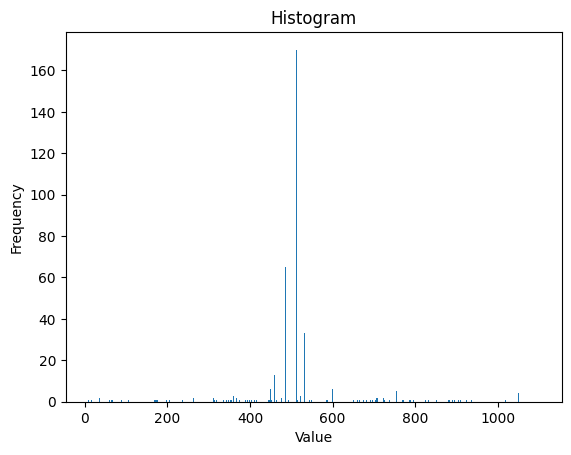

In [27]:
# 直方图
import matplotlib.pyplot as plt
import numpy as np

counts = np.array([patch_count[x] for x in patch_count])

hist, bins = np.histogram(counts, bins=10, range=(0, 1000))
print("直方图")
print("  ", end="")
for i in hist:
    print("{:>3}".format(i), end=" ")
print("")
for i in bins:
    i = int(i)
    print("{:>3}".format(i), end=" ")

plt.hist(counts, bins=range(min(counts), max(counts)+2), rwidth=0.8, align='left')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [7]:
import os
import json
import numpy as np

DATA_ROOT = "D:/Dataset/"
config_name = '../../settings/environment.json'
if os.path.exists(config_name):
    with open(config_name, 'r') as file:
        info = json.load(file)
        DATA_ROOT = info["TCT_DATA_ROOT"]

input_dir = DATA_ROOT+'TCT-NGC-2023/base-data/'
output_dir = DATA_ROOT+'TCT-NGC-2023/info/'

def get_directory_size(directory):
    total_size = 0

    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            file_path = os.path.join(dirpath, filename)
            # 获取文件大小并累加
            total_size += os.path.getsize(file_path)

    # 将字节转换为GB
    total_size_gb = total_size / (1024 ** 3)

    return total_size_gb

sub_dirs = [
        'Unannotated_XIMEA/Unannotated-XIMEA-TCTNGC-NILM/',
        'Unannotated_XIMEA/Unannotated-XIMEA-TCTNGC-POS/']
wsi_set = list()
for sub_dir in sub_dirs:
    for wsi in os.listdir(input_dir+sub_dir):
        wsi_set.append(input_dir+sub_dir+wsi)
img_count = 0
for wsi_path in wsi_set:
    wsi_name = os.path.basename(wsi_path)
    for file in os.listdir(wsi_path):
        if os.path.splitext(file)[1].lower() in ['.jpg', '.jpeg', '.png', '.gif']:
            img_count += 1
file_size = get_directory_size(input_dir + 'Unannotated_XIMEA')

print("XIMEA")
print("wsi_num: {}".format(len(wsi_set)))
print("img_num: {}".format(img_count))
print("size: {:.2f}".format(file_size))

sub_dirs = [
        'Unannotated_KSJ/Unannotated-KSJ-TCTNGC-NILM/', 
        'Unannotated_KSJ/Unannotated-KSJ-TCTNGC-POS/',
]
wsi_set = list()
for sub_dir in sub_dirs:
    for wsi in os.listdir(input_dir+sub_dir):
        wsi_set.append(input_dir+sub_dir+wsi)
img_count = 0
for wsi_path in wsi_set:
    wsi_name = os.path.basename(wsi_path)
    for file in os.listdir(wsi_path):
        if os.path.splitext(file)[1].lower() in ['.jpg', '.jpeg', '.png', '.gif']:
            img_count += 1
file_size = get_directory_size(input_dir + 'Unannotated_KSJ')
     
print("KSJ")
print("wsi_num: {}".format(len(wsi_set)))
print("img_num: {}".format(img_count))
print("size: {:.2f}".format(file_size))

XIMEA
wsi_num: 576
img_num: 274707
size: 134.62
KSJ
wsi_num: 385
img_num: 291013
size: 42.68


# 分析某个目录下的wsi和patch信息

In [3]:
def get_infos_from_directory(dir: str):
    DATA_ROOT = "D:/Dataset/"
    config_name = '../../settings/environment.json'
    if os.path.exists(config_name):
        with open(config_name, 'r') as file:
            info = json.load(file)
            DATA_ROOT = info["TCT_DATA_ROOT"]
    input_dir = DATA_ROOT+'TCT-NGC-2023/base-data/'

    sub_root_dir = os.path.join(input_dir, dir)
    sub_dirs = os.listdir(sub_root_dir)

    wsi_set = list()
    for sub_dir in sub_dirs:
        for wsi in os.listdir(os.path.join(sub_root_dir, sub_dir)):
            if not os.path.isdir(os.path.join(sub_root_dir, sub_dir, wsi)):
                continue
            wsi_set.append(os.path.join(sub_root_dir, sub_dir, wsi))
    img_count = 0
    for wsi_path in wsi_set:
        for file in os.listdir(wsi_path):
            if os.path.splitext(file)[1].lower() in ['.jpg', '.jpeg', '.png', '.gif']:
                img_count += 1
    file_size = get_directory_size(os.path.join(input_dir, dir))
    
    print(dir)
    print("wsi_num: {}".format(len(wsi_set)))
    print("img_num: {}".format(img_count))
    print("size: {:.2f}GB".format(file_size))
    print()

In [77]:
get_infos_from_directory('Annotated_KSJ')
get_infos_from_directory('Annotated_XIMEA')
get_infos_from_directory('Unannotated_KSJ')
get_infos_from_directory('Unannotated_XIMEA')

Annotated_KSJ
wsi_num: 193
img_num: 46621
size: 7.33GB

Annotated_XIMEA
wsi_num: 200
img_num: 81338
size: 45.49GB

Unannotated_KSJ
wsi_num: 385
img_num: 291013
size: 42.68GB

Unannotated_XIMEA
wsi_num: 576
img_num: 274707
size: 134.62GB



In [83]:
unannotated_ksj_pos_path = "/root/commonfile/TCT-NGC-2023/base-data/Unannotated_KSJ/Unannotated-KSJ-TCTNGC-POS"
wsi_ksj_pos_set = set()
for wsi in os.listdir(unannotated_ksj_pos_path):
    if os.path.isdir(os.path.join(unannotated_ksj_pos_path, wsi)):
       wsi_ksj_pos_set.add(wsi)

path2 = "/root/commonfile/TCT-NGC-2023/base-data/Annotated_KSJ/Annotated-KSJ-TCTNGC-TXT"
wsi_ann_ksj_set = set()
for wsi in os.listdir(path2):
    if os.path.isdir(os.path.join(path2, wsi)):
       wsi_ann_ksj_set.add(wsi)
       
path3 = "/root/commonfile/TCT-NGC-2023/base-data/Annotated_KSJ/Annotated-KSJ-TCTNGC-XML"
for wsi in os.listdir(path3):
    if os.path.isdir(os.path.join(path3, wsi)):
       wsi_ann_ksj_set.add(wsi)

print(len(wsi_ann_ksj_set))
print(len(wsi_ksj_pos_set.intersection(wsi_ann_ksj_set)))
print(wsi_ann_ksj_set - wsi_ksj_pos_set.intersection(wsi_ann_ksj_set))

193
140
{'F68', 'F14', 'F71', 'c00569144', 'F88', 'F93', 'c00565921', 'F87', 'F86', 'F98', 'F72', 'c00569477', 'F84', 'c00563160', 'F12', 'F77', 'F61', 'F69', 'F62', 'F73', 'F79', 'F65', 'BJTCT563940', 'F80', 'F83', 'F15', 'F78', 'BJTCT563651', 'F99', 'F89', 'F13', 'F82', 'F90', 'F70', 'F66', 'F75', 'F63', 'BJTCT563861', 'F100', 'F81', 'F74', 'F91', 'F94', 'F11', 'F76', 'c00565809', 'F67', 'F95', 'F85', 'F92', 'F97', 'F64', 'F96'}


In [118]:
def count_images_from_directory(dir: str):
    count = 0
    for file in os.listdir(dir):
        if os.path.splitext(file)[1].lower() in ['.jpg', '.jpeg', '.png', '.gif']:
            count += 1
    # print("{}: {}".format(dir, count))
    return count

def print_count_images_from_directory(dir: str):
    count = 0
    for file in os.listdir(dir):
        if os.path.splitext(file)[1].lower() in ['.jpg', '.jpeg', '.png', '.gif']:
            count += 1
    print("{}: {}".format(dir, count))

def print_dict(my_dict):
    for key, value in my_dict.items():
        print(f"{key}: {value}")

In [119]:
print_count_images_from_directory("/root/commonfile/TCT-NGC-2023/base-data/Annotated_KSJ/Annotated-KSJ-TCTNGC-XML/c00570667")
print_count_images_from_directory("/root/commonfile/TCT-NGC-2023/base-data/Unannotated_KSJ/Unannotated-KSJ-TCTNGC-POS/c00570667")

/root/commonfile/TCT-NGC-2023/base-data/Annotated_KSJ/Annotated-KSJ-TCTNGC-XML/c00570667: 572
/root/commonfile/TCT-NGC-2023/base-data/Unannotated_KSJ/Unannotated-KSJ-TCTNGC-POS/c00570667: 544


# 对比同一张WSI在标注数据集和未标注数据集的图片数量差

In [109]:
# 标注数据集集合
path2 = "/root/commonfile/TCT-NGC-2023/base-data/Annotated_KSJ/Annotated-KSJ-TCTNGC-TXT"
wsi_ann_ksj_set = set()
for wsi in os.listdir(path2):
    if os.path.isdir(os.path.join(path2, wsi)):
       wsi_ann_ksj_set.add(os.path.join(path2, wsi))
       
path3 = "/root/commonfile/TCT-NGC-2023/base-data/Annotated_KSJ/Annotated-KSJ-TCTNGC-XML"
for wsi in os.listdir(path3):
    if os.path.isdir(os.path.join(path3, wsi)):
       wsi_ann_ksj_set.add(os.path.join(path3, wsi))

ksj_pos_path = "/root/commonfile/TCT-NGC-2023/base-data/Unannotated_KSJ/Unannotated-KSJ-TCTNGC-POS"
ksj_nilm_path = "/root/commonfile/TCT-NGC-2023/base-data/Unannotated_KSJ/Unannotated-KSJ-TCTNGC-NILM"

ksj_pos = os.listdir(ksj_pos_path)
ksj_nilm = os.listdir(ksj_nilm_path)

patch_num_ann = dict()
patch_num_unann = dict()
for wsi in wsi_ann_ksj_set:
    wsi_name = os.path.basename(wsi)
    patch_num_ann[wsi_name] = count_images_from_directory(wsi)
    if wsi_name in ksj_pos:
        patch_num_unann[wsi_name] = count_images_from_directory(os.path.join(ksj_pos_path, wsi_name))
    else:
        patch_num_unann[wsi_name] = count_images_from_directory(os.path.join(ksj_nilm_path, wsi_name))
        
for wsi in patch_num_ann:
    print("{}: {} {} {}".format(wsi, patch_num_ann[wsi], patch_num_unann[wsi], patch_num_unann[wsi] - patch_num_ann[wsi]))
    

F100: 32 943 911
JPL-679-1: 681 681 0
BJFFK-XA572477: 182 696 514
F12: 2 966 964
F69: 57 920 863
BJFFK-JPL570998: 561 738 177
c00570277: 905 905 0
C00569142: 32 166 134
BJFFK-XA573779: 227 585 358
F91: 60 943 883
c00563160: 5 960 955
BJFFK-XA571327: 9 675 666
BJFFK-XA575436: 488 726 238
F72: 101 943 842
c00568308: 14 67 53
c00565921: 3 1032 1029
C00568217: 392 758 366
BJFFK-XA575215: 16 916 900
F80: 19 943 924
BJFFK-XA571457: 444 635 191
BJFFK-XA572478: 170 682 512
c00569478: 267 267 0
F13: 79 920 841
BJFFK-XA573639: 4 133 129
BJFFK-XA573871: 272 572 300
F73: 61 943 882
F98: 45 943 898
c00567894: 16 37 21
F25: 146 874 728
BJTCT563651: 917 943 26
BJFFK-XA573708: 830 863 33
BJFFK-XA572293: 153 688 535
BJFFK-XA571541: 691 792 101
F86: 95 836 741
BJFFK-XA571452: 6 597 591
BJFFK-XA571994: 276 577 301
F83: 411 920 509
BJFFK-XA572375: 129 445 316
c00563357: 724 724 0
F11: 47 943 896
F7: 163 966 803
c00567195: 106 106 0
BJFFK-XA572376: 63 704 641
BJFFK-XA573974: 681 809 128
BJFFK-XA571455: 57 

# 显示标注框

In [110]:
import cv2
import matplotlib.pyplot as plt

def show_image_with_bbox(image_path, x, y, w, h):
    # 读取图片
    image = cv2.imread(image_path)
    # 绘制标注框
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)  # 在图像上绘制矩形框
    # 将 OpenCV 图像转换为 RGB 格式
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # 在窗口中展示带有标注框的图片
    plt.imshow(image_rgb)
    # 隐藏坐标轴
    plt.axis('off')
    # 显示图片
    plt.show()



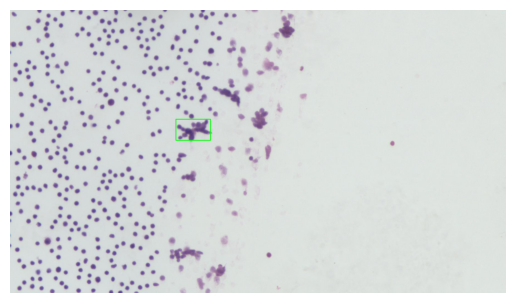

In [112]:
show_image_with_bbox('/root/commonfile/TCT-NGC-2023/base-data/Annotated_KSJ/Annotated-KSJ-TCTNGC-TXT/F12/23_27.jpg', 599, 397, 125, 76)

# 对比同一张WSI在标注、过滤、未标注数据集的图片差
所用函数和前面相同

In [12]:
def count_images_from_directory(dir: str):
    count = 0
    for file in os.listdir(dir):
        if os.path.splitext(file)[1].lower() in ['.jpg', '.jpeg', '.png', '.gif']:
            count += 1
    # print("{}: {}".format(dir, count))
    return count

def print_count_images_from_directory(dir: str):
    count = 0
    for file in os.listdir(dir):
        if os.path.splitext(file)[1].lower() in ['.jpg', '.jpeg', '.png', '.gif']:
            count += 1
    print("{}: {}".format(dir, count))

def print_dict(my_dict):
    for key, value in my_dict.items():
        print(f"{key}: {value}")

In [18]:
import os 

# 标注数据集集合
ksj_ann_txt_path = "/root/commonfile/TCT-NGC-2023/base-data/Annotated_KSJ/Annotated-KSJ-TCTNGC-TXT"
wsi_ann_ksj_set = set()
for wsi in os.listdir(ksj_ann_txt_path):
    if os.path.isdir(os.path.join(ksj_ann_txt_path, wsi)):
       wsi_ann_ksj_set.add(os.path.join(ksj_ann_txt_path, wsi))
       
ksj_ann_xml_path = "/root/commonfile/TCT-NGC-2023/base-data/Annotated_KSJ/Annotated-KSJ-TCTNGC-XML"
for wsi in os.listdir(ksj_ann_xml_path):
    if os.path.isdir(os.path.join(ksj_ann_xml_path, wsi)):
       wsi_ann_ksj_set.add(os.path.join(ksj_ann_xml_path, wsi))

# 未标注数据集集合
ksj_pos_path = "/root/commonfile/TCT-NGC-2023/base-data/Unannotated_KSJ/Unannotated-KSJ-TCTNGC-POS"
ksj_nilm_path = "/root/commonfile/TCT-NGC-2023/base-data/Unannotated_KSJ/Unannotated-KSJ-TCTNGC-NILM"

ksj_pos = os.listdir(ksj_pos_path)
ksj_nilm = os.listdir(ksj_nilm_path)

# 过滤后数据集集合
ksj_filter_pos_path = "/root/commonfile/TCT-NGC-2023/filter-data/Unannotated_KSJ/Unannotated-KSJ-TCTNGC-POS"
ksj_filter_nilm_path = "/root/commonfile/TCT-NGC-2023/filter-data/Unannotated_KSJ/Unannotated-KSJ-TCTNGC-NILM"

patch_num_ann = dict()
patch_num_unann = dict()
patch_num_filter = dict()
for wsi in wsi_ann_ksj_set:
    wsi_name = os.path.basename(wsi)
    patch_num_ann[wsi_name] = count_images_from_directory(wsi)
    if wsi_name in ksj_pos:
        patch_num_unann[wsi_name] = count_images_from_directory(os.path.join(ksj_pos_path, wsi_name))
        patch_num_filter[wsi_name] = count_images_from_directory(os.path.join(ksj_filter_pos_path, wsi_name))
    else:
        patch_num_unann[wsi_name] = count_images_from_directory(os.path.join(ksj_nilm_path, wsi_name))
        patch_num_filter[wsi_name] = count_images_from_directory(os.path.join(ksj_filter_nilm_path, wsi_name))
        
for wsi in patch_num_ann:
    print("{}: {} {} {} {}".format(wsi, patch_num_ann[wsi], patch_num_unann[wsi], patch_num_filter[wsi], patch_num_unann[wsi] - patch_num_ann[wsi]))
    

BJFFK-XA574864: 25 298 298 273
BJFFK-XA575743: 599 796 796 197
C0056281f: 1 89 89 88
C00569018: 181 343 330 162
c00569144: 7 984 803 977
F97: 338 943 759 605
F99: 14 943 776 929
F72: 101 943 909 842
C00562663: 2 18 18 16
BJFFK-XA573708: 830 863 856 33
BJFFK-XA571457: 444 635 629 191
c00563160: 5 960 770 955
c00569478: 267 267 267 0
BJFFK-XA570999: 50 517 517 467
BJFFK-XA571608: 190 832 832 642
BJFFK-XA571327: 9 675 675 666
BJFFK-XA572478: 170 682 682 512
BJFFK-XA573815: 305 626 626 321
BJFFK-XA571886: 773 792 792 19
F84: 67 966 793 899
c00570277: 905 905 905 0
BJFFK-XA574570: 543 777 777 234
BJFFK-XA574865: 203 730 730 527
F12: 2 966 767 964
BJFFK-XA574584: 49 690 690 641
BJFFK-SCLC572373: 152 755 754 603
c00568523: 3 29 29 26
C00569706: 322 322 322 0
BJFFK-XA574012: 767 836 836 69
BJFFK-XA570823: 2 447 447 445
F92: 114 984 870 870
BJFFK-XA571508: 262 319 319 57
BJFFK-XA572375: 129 445 445 316
BJFFK-XA573639: 4 133 133 129
BJFFK-XA571134: 507 883 883 376
C00562488: 43 219 219 176
BJFFK

In [2]:
def get_infos_from_filter_directory(dir: str):
    DATA_ROOT = "D:/Dataset/"
    config_name = '../../settings/environment.json'
    if os.path.exists(config_name):
        with open(config_name, 'r') as file:
            info = json.load(file)
            DATA_ROOT = info["TCT_DATA_ROOT"]
    input_dir = DATA_ROOT+'TCT-NGC-2023/filter-data/'

    sub_root_dir = os.path.join(input_dir, dir)
    sub_dirs = os.listdir(sub_root_dir)

    wsi_set = list()
    for sub_dir in sub_dirs:
        for wsi in os.listdir(os.path.join(sub_root_dir, sub_dir)):
            if not os.path.isdir(os.path.join(sub_root_dir, sub_dir, wsi)):
                continue
            wsi_set.append(os.path.join(sub_root_dir, sub_dir, wsi))
    img_count = 0
    for wsi_path in wsi_set:
        for file in os.listdir(wsi_path):
            if os.path.splitext(file)[1].lower() in ['.jpg', '.jpeg', '.png', '.gif']:
                img_count += 1
    file_size = get_directory_size(os.path.join(input_dir, dir))
    
    print(dir)
    print("wsi_num: {}".format(len(wsi_set)))
    print("img_num: {}".format(img_count))
    print("size: {:.2f}GB".format(file_size))
    print()

In [11]:
get_infos_from_filter_directory('Unannotated_KSJ')
get_infos_from_filter_directory('Unannotated_XIMEA')

get_infos_from_directory('Unannotated_KSJ')
get_infos_from_directory('Unannotated_XIMEA')

Unannotated_KSJ
wsi_num: 384
img_num: 258095
size: 41.24GB

Unannotated_XIMEA
wsi_num: 566
img_num: 173423
size: 106.73GB

Unannotated_KSJ
wsi_num: 385
img_num: 291013
size: 42.68GB

Unannotated_XIMEA
wsi_num: 576
img_num: 274707
size: 134.62GB



# 对比缺少的WSI

In [28]:
def get_set_from_dir(dir, is_filter):
    DATA_ROOT = "D:/Dataset/"
    config_name = '../../settings/environment.json'
    if os.path.exists(config_name):
        with open(config_name, 'r') as file:
            info = json.load(file)
            DATA_ROOT = info["TCT_DATA_ROOT"]
    if is_filter:
        input_dir = DATA_ROOT+'TCT-NGC-2023/filter-data/'
    else:
        input_dir = DATA_ROOT+'TCT-NGC-2023/base-data/'
    
    wsi_set = set()
    dir = os.path.join(input_dir, dir)
    sub_dirs = os.listdir(dir)
    for sub_dir in sub_dirs:
        sub_dir = os.path.join(dir, sub_dir)
        sub_sub_dirs = os.listdir(sub_dir)
        for sub_sub_dir in sub_sub_dirs:
            sub_sub_dir = os.path.join(sub_dir, sub_sub_dir)
            if os.path.isdir(sub_sub_dir):
                wsi_set.add(os.path.basename(sub_sub_dir))
    return wsi_set

In [30]:
filter_ximea = get_set_from_dir('Unannotated_XIMEA', True)
base_ximea = get_set_from_dir('Unannotated_XIMEA', False)
base_ximea - filter_ximea 

{'BJXFK-NILM-606991', 'BJXFK-NILM-608934', 'BJXK-XIMEA-FFK-N-601988'}